Siddharth Tomar - N01580148

# **Importing Librariers**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


# Mounting drive

In [6]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading dataset and printing it**

In [7]:
# Load the dataset
file_path = '/content/drive/MyDrive/PythonScripts/PythonScripts/Assign08/Assign08/titanic_train.csv'
titanic_df =pd.read_csv(file_path)

In [8]:
# Print the first 5 rows
print(titanic_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


# Dropping Unwanted Features

In [9]:
# Drop unnecessary features
titanic_df = titanic_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Dropping Rows with missing Values

In [10]:
# Drop rows with missing values
titanic_df = titanic_df.dropna()

In [11]:
print(titanic_df.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3    male  22.0      1      0   7.2500        S
1            2         1       1  female  38.0      1      0  71.2833        C
2            3         1       3  female  26.0      0      0   7.9250        S
3            4         1       1  female  35.0      1      0  53.1000        S
4            5         0       3    male  35.0      0      0   8.0500        S


# Converting categorical features into integer values

In [12]:
# Convert categorical features into integers
label_encoder = LabelEncoder()
titanic_df['Sex'] = label_encoder.fit_transform(titanic_df['Sex'])
titanic_df['Embarked'] = label_encoder.fit_transform(titanic_df['Embarked'].astype(str))


In [13]:
#After converting features
print(titanic_df.head())

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    1  22.0      1      0   7.2500         2
1            2         1       1    0  38.0      1      0  71.2833         0
2            3         1       3    0  26.0      0      0   7.9250         2
3            4         1       1    0  35.0      1      0  53.1000         2
4            5         0       3    1  35.0      0      0   8.0500         2


# Spliting the dataset

In [14]:
# Split data into features and target
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

In [15]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,2
1,2,1,0,38.0,1,0,71.2833,0
2,3,3,0,26.0,0,0,7.9250,2
3,4,1,0,35.0,1,0,53.1000,2
4,5,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
885,886,3,0,39.0,0,5,29.1250,1
886,887,2,1,27.0,0,0,13.0000,2
887,888,1,0,19.0,0,0,30.0000,2
889,890,1,1,26.0,0,0,30.0000,0


In [16]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

# Training and Testing The dataset And Printing it:

In [17]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
X_train, X_test, y_train, y_test

(     PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
 58            59       2    0   5.0      1      2  27.7500         2
 57            58       3    1  28.5      0      0   7.2292         0
 96            97       1    1  71.0      0      0  34.6542         0
 210          211       3    1  24.0      0      0   7.0500         2
 569          570       3    1  32.0      0      0   7.8542         2
 ..           ...     ...  ...   ...    ...    ...      ...       ...
 93            94       3    1  26.0      1      2  20.5750         2
 135          136       2    1  23.0      0      0  15.0458         0
 338          339       3    1  45.0      0      0   8.0500         2
 549          550       2    1   8.0      1      1  36.7500         2
 131          132       3    1  20.0      0      0   7.0500         2
 
 [498 rows x 8 columns],
      PassengerId  Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
 641          642       1    0  24.0      0      0   69.3000  

# **Decision Tree Classifier**

In [19]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)

## Random Forest Classifier

In [20]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)

## Confusion matrices

In [21]:
dt_conf_matrix = confusion_matrix(y_test, dt_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)


## Calculate evaluation metrics

In [22]:
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

In [23]:
dt_metrics = calculate_metrics(y_test, dt_pred)
rf_metrics = calculate_metrics(y_test, rf_pred)

# Calculated values For Decision Tree

In [24]:
print("\nDecision Tree Metrics:")
print("Accuracy:", dt_metrics[0])
print("Precision:", dt_metrics[1])
print("Recall:", dt_metrics[2])
print("F1-Score:", dt_metrics[3])


Decision Tree Metrics:
Accuracy: 0.6682242990654206
Precision: 0.6105263157894737
Recall: 0.6304347826086957
F1-Score: 0.6203208556149733


## Confusion matrix for Decision Tree Classifier

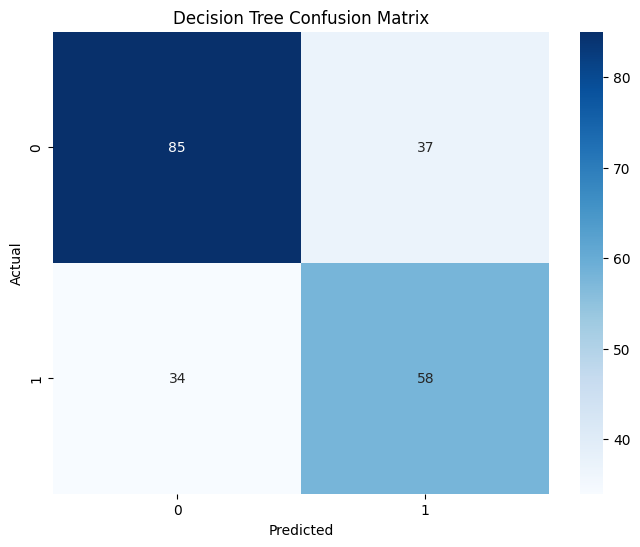

In [25]:
# Plot confusion matrix for Decision Tree Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Calculated Values for Random Forest

In [26]:
print("\nRandom Forest Metrics:")
print("Accuracy:", rf_metrics[0])
print("Precision:", rf_metrics[1])
print("Recall:", rf_metrics[2])
print("F1-Score:", rf_metrics[3])


Random Forest Metrics:
Accuracy: 0.780373831775701
Precision: 0.7922077922077922
Recall: 0.6630434782608695
F1-Score: 0.7218934911242603


# Confusion matrix for Random Forest Classifier

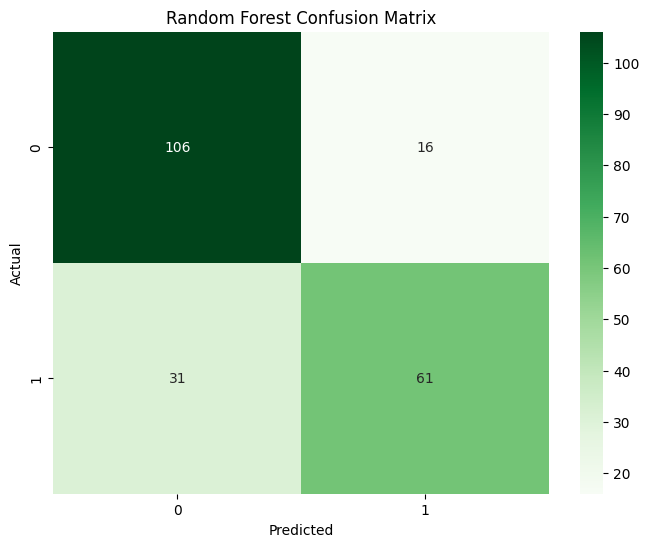

In [27]:
# Plot confusion matrix for Random Forest Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()